# A simple parameter exploration

This notebook demonstrates a very simple parameter exploration of a custom function that we have defined. It is a simple function that returns the distance to a unit circle, so we expect our parameter exploration to resemble a circle. 

In [1]:
# change into root directory to the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

%load_ext autoreload
%autoreload 2

In [49]:
import numpy as np

from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.exploration import BoxSearch

import neurolib.utils.functions as func

import random

## Define the evaluation function
Here we define a very simple evaluation function. The function needs to take in `traj` as an argument, which is the pypet trajectory. This is how the function knows what parameters were assigned to it. Using the builtin function `search.getParametersFromTraj(traj)` we can then retrieve the parameters for this run. They are returned as a dictionary and can be accessed in the function. 

In the last step, we use `search.saveOutputsToPypet(result_dict, traj)` to save the results to the pypet trajectory and to an HDF. In between, the computational magic happens!

In [49]:
def explore_me(traj):
    pars = search.getParametersFromTraj(traj)
    # let's calculate the distance to a circle
    computation_result = abs((pars['x']**2 + pars['y']**2) - 1)
    result_dict = {"distance" : computation_result}
    search.saveOutputsToPypet(result_dict, traj)

## Define the parameter space and exploration

Here we define which space we want to cover. For this, we use the builtin class `ParameterSpace` which provides a very easy interface to the exploration. We simply pass the evaluation function and the parameter space to the `BoxSearch` class and initialize the exploration using `search.initializeExploration()`.

In [ ]:
parameters = ParameterSpace({"x": np.linspace(-2, 2, 2), "y": np.linspace(-2, 2, 2)})
# info: chose np.linspace(-2, 2, 20) or more, values here are low for testing
search = BoxSearch(evalFunction = explore_me, exploreParameters=parameters)
search.initializeExploration()

## Run

And off we go!

In [ ]:
search.run()

## Get results

We can easily obtain the results from pypet. First we call `search.loadResults()` to make sure that the results are loaded from the hdf file to our instance.

In [ ]:
search.loadResults()
print("Number of results: {}".format(len(search.results)))

The runs are also ordered in a simple pandas dataframe called `search.dfResults`. We cycle through all results by calling `search.results[i]` and loading the desired result (here the distance to the circle) into the dataframe

In [118]:
for i in search.dfResults.index:
    search.dfResults.loc[i, 'distance'] = search.results[i]['distance']
    
search.dfResults

,x,y,distance
0,-2.0,-2.000000,7.000000
1,-2.0,-1.789474,6.202216
2,-2.0,-1.578947,5.493075
3,-2.0,-1.368421,4.872576
4,-2.0,-1.157895,4.340720
...,...,...,...
395,2.0,1.157895,4.340720
396,2.0,1.368421,4.872576
397,2.0,1.578947,5.493075
398,2.0,1.789474,6.202216


And of course a plot can visualize the results very easily.

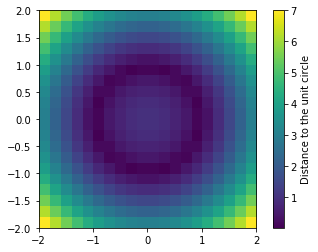

In [70]:
import matplotlib.pyplot as plt
plt.imshow(search.dfResults.pivot_table(values='distance', index = 'x', columns='y'), \
           extent = [min(search.dfResults.x), max(search.dfResults.x),
                     min(search.dfResults.y), max(search.dfResults.y)], origin='lower')
plt.colorbar(label='Distance to the unit circle')